In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("socialMedia.csv")
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


## DATA DESCRIPTION AND INFO


In [11]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [54]:
a  = df['Avg_Daily_Usage_Hours'] > df['Sleep_Hours_Per_Night']
df[a]

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
13,14,18,Female,High School,Mexico,6.5,Instagram,Yes,5.5,5,Single,4,9
23,24,20,Female,Undergraduate,Portugal,5.7,TikTok,Yes,5.4,5,Single,4,8
25,26,19,Female,High School,Ireland,6.1,Instagram,Yes,5.2,5,Complicated,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,690,23,Male,Graduate,Spain,6.5,Facebook,Yes,6.1,5,Single,4,8
692,693,19,Female,Undergraduate,India,7.0,TikTok,Yes,5.8,4,Single,5,9
694,695,20,Female,Undergraduate,Turkey,6.6,Instagram,Yes,6.1,5,Single,4,8
696,697,21,Female,Undergraduate,Mexico,6.3,TikTok,Yes,6.2,5,Single,4,8


## MAP

In [8]:

# European countries with coordinates
EUROPEAN_COORDS = {
    'Albania': (41.15, 20.17), 'Austria': (47.52, 14.55), 'Belarus': (53.71, 27.95),
    'Belgium': (50.85, 4.35), 'Bosnia and Herzegovina': (43.92, 17.68),
    'Bulgaria': (42.73, 25.49), 'Croatia': (45.10, 15.20), 'Cyprus': (35.13, 33.43),
    'Czech Republic': (49.82, 15.47), 'Czechia': (49.82, 15.47),
    'Denmark': (56.26, 9.50), 'Estonia': (58.60, 25.01), 'Finland': (61.92, 25.75),
    'France': (46.23, 2.21), 'Germany': (51.17, 10.45), 'Greece': (39.07, 21.82),
    'Hungary': (47.16, 19.50), 'Iceland': (64.96, -19.02), 'Ireland': (53.14, -7.69),
    'Italy': (41.87, 12.57), 'Kosovo': (42.60, 20.90), 'Latvia': (56.88, 24.60),
    'Lithuania': (55.17, 23.88), 'Luxembourg': (49.82, 6.13), 'Malta': (35.94, 14.38),
    'Moldova': (47.41, 28.37), 'Montenegro': (42.71, 19.37), 'Netherlands': (52.13, 5.29),
    'North Macedonia': (41.51, 21.45), 'Norway': (60.47, 8.47), 'Poland': (51.92, 19.15),
    'Portugal': (39.40, -8.22), 'Romania': (45.94, 24.97), 'Russia': (55.76, 37.62),
    'Serbia': (44.02, 21.01), 'Slovakia': (48.67, 19.70), 'Slovenia': (46.15, 14.99),
    'Spain': (40.46, -3.75), 'Sweden': (60.13, 18.64), 'Switzerland': (46.82, 8.23),
    'Turkey': (39.93, 32.86), 'Ukraine': (48.38, 31.17), 'United Kingdom': (55.38, -3.44),
    'UK': (55.38, -3.44),
}

# Platform colors (customize as needed)
PLATFORM_COLORS = {
    'Facebook':   '#1877F2',
    'Instagram':  '#E4405F',
    'TikTok':     '#010101',
    'WhatsApp':   '#25D366',
    'YouTube':    '#FF0000',
    'Twitter':    '#1DA1F2',
    'X':          '#000000',
    'Snapchat':   '#FFFC00',
    'LinkedIn':   '#0A66C2',
    'Telegram':   '#0088CC',
    'Pinterest':  '#E60023',
    'VKontakte':  '#0077FF',
    'VK':         '#0077FF',
    'WeChat':     '#09B83E',
    'LINE':       '#00C300',
    'KakaoTalk':  '#FFE812',
}



def create_europe_social_media_map(df, country_col='Country', platform_col='Platform', 
                                    users_col='Users', top_n=3, title='Top 3 Social Media in Europe'):
    """
    Create a concentric bubble map for European social media usage.
    """
    
    # 1. Filter European countries only
    european_countries = list(EUROPEAN_COORDS.keys())
    df_europe = df[df[country_col].isin(european_countries)].copy()
    
    # 2. Count users per country-platform (aggregate if needed)
    df_agg = df_europe.groupby([country_col, platform_col]).size().reset_index(name='count')
    
    # 3. Get top N platforms per country
    df_top = (df_agg.groupby(country_col, group_keys=False)
              .apply(lambda x: x.nlargest(top_n, 'count'))
              .reset_index(drop=True))
    
    # 4. Add rank (1 = most users, 2 = second, etc.)
    df_top['Rank'] = df_top.groupby(country_col).cumcount() + 1
    
    # 5. Add coordinates
    df_top['lat'] = df_top[country_col].map(lambda x: EUROPEAN_COORDS.get(x, (None, None))[0])
    df_top['lon'] = df_top[country_col].map(lambda x: EUROPEAN_COORDS.get(x, (None, None))[1])
    df_top = df_top.dropna(subset=['lat', 'lon'])
    
    # 6. Calculate bubble sizes (rank 1 = largest circle)
    max_count = df_top['count'].max()
    base_sizes = {1: 50, 2: 35, 3: 20}
    df_top['size'] = df_top.apply(
        lambda r: base_sizes.get(r['Rank'], 15) * (r['count'] / max_count) ** 0.3, axis=1
    )
    df_top['size'] = df_top['size'].clip(lower=8)
    
    # 7. Track which platforms have been added to legend
    platforms_in_legend = set()
    
    # 8. Create figure
    fig = go.Figure()
    
    # Draw largest circles first (rank 1), then smaller on top
    for rank in sorted(df_top['Rank'].unique(), reverse=False):
        rank_data = df_top[df_top['Rank'] == rank]
        
        for platform in rank_data[platform_col].unique():
            platform_data = rank_data[rank_data[platform_col] == platform]
            color = PLATFORM_COLORS.get(platform, '#888888')
            
            # Determine if we should show this platform in legend (only first occurrence)
            show_in_legend = platform not in platforms_in_legend
            if show_in_legend:
                platforms_in_legend.add(platform)
            
            fig.add_trace(go.Scattergeo(
                lon=platform_data['lon'].tolist(),
                lat=platform_data['lat'].tolist(),
                text=[f"{row[country_col]}<br>{platform}<br>{row['count']:,} users<br>Rank {row['Rank']}" 
                      for _, row in platform_data.iterrows()],
                hoverinfo='text',
                marker=dict(
                    size=platform_data['size'].tolist(),
                    color=color,
                    line=dict(width=1.5, color='white'),
                    opacity=0.9,
                ),
                name=platform,
                legendgroup=platform,
                showlegend=show_in_legend,  # Fixed: now a regular Python bool
            ))
    
    # 9. Layout
    fig.update_layout(
        title=dict(text=title, x=0.5, font=dict(size=18)),
        showlegend=True,
        legend=dict(yanchor="top", y=0.98, xanchor="left", x=0.01, bgcolor="rgba(255,255,255,0.8)"),
        geo=dict(
            scope='europe',
            resolution=50,
            showland=True, landcolor='rgb(235, 235, 235)',
            showocean=True, oceancolor='rgb(255, 255, 255)',
            showcountries=True, countrycolor='rgb(200, 200, 200)',
            showcoastlines=True, coastlinecolor='rgb(180, 180, 180)',
            center=dict(lat=54, lon=15),
            lonaxis=dict(range=[-25, 45]),
            lataxis=dict(range=[34, 72]),
        ),
        margin=dict(l=0, r=0, t=50, b=0),
        width=1000, height=800,
    )
    
    return fig

# Create the map
fig = create_europe_social_media_map(
    df,
    country_col='Country',              # Your country column
    platform_col='Most_Used_Platform',  # Your platform column
    top_n=3,
    title='Top 3 Social Media Platforms in Europe'
)

fig.show()

In [9]:
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [12]:
df["Relationship_Status"].value_counts()

Relationship_Status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64

In [13]:
df["Affects_Academic_Performance"].value_counts()

Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64

In [49]:
a = df["Country"].value_counts()
a

Country
India          53
USA            40
Canada         34
France         27
Mexico         27
               ..
Oman            1
Afghanistan     1
Syria           1
Yemen           1
Bhutan          1
Name: count, Length: 110, dtype: int64

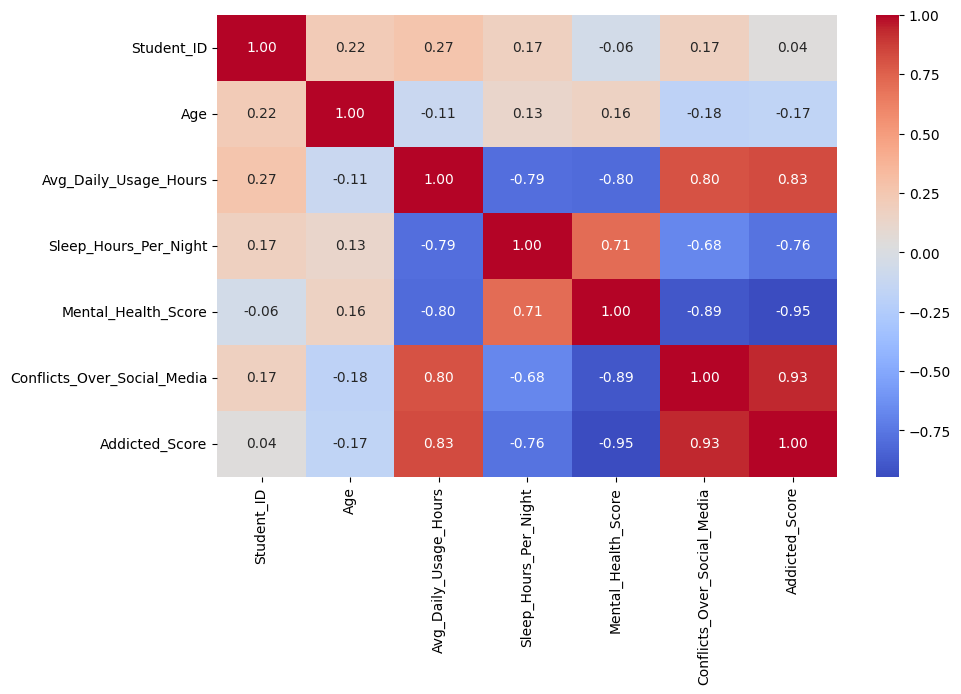

In [14]:
# Assume df is your DataFrame
numeric_df = df.select_dtypes(include='number')  # keep only numerical columns

corr = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

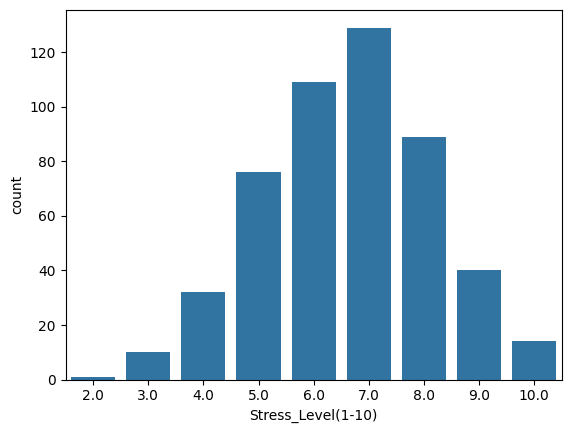

In [14]:
sns.countplot(x="Stress_Level(1-10)", data=df)
plt.show()

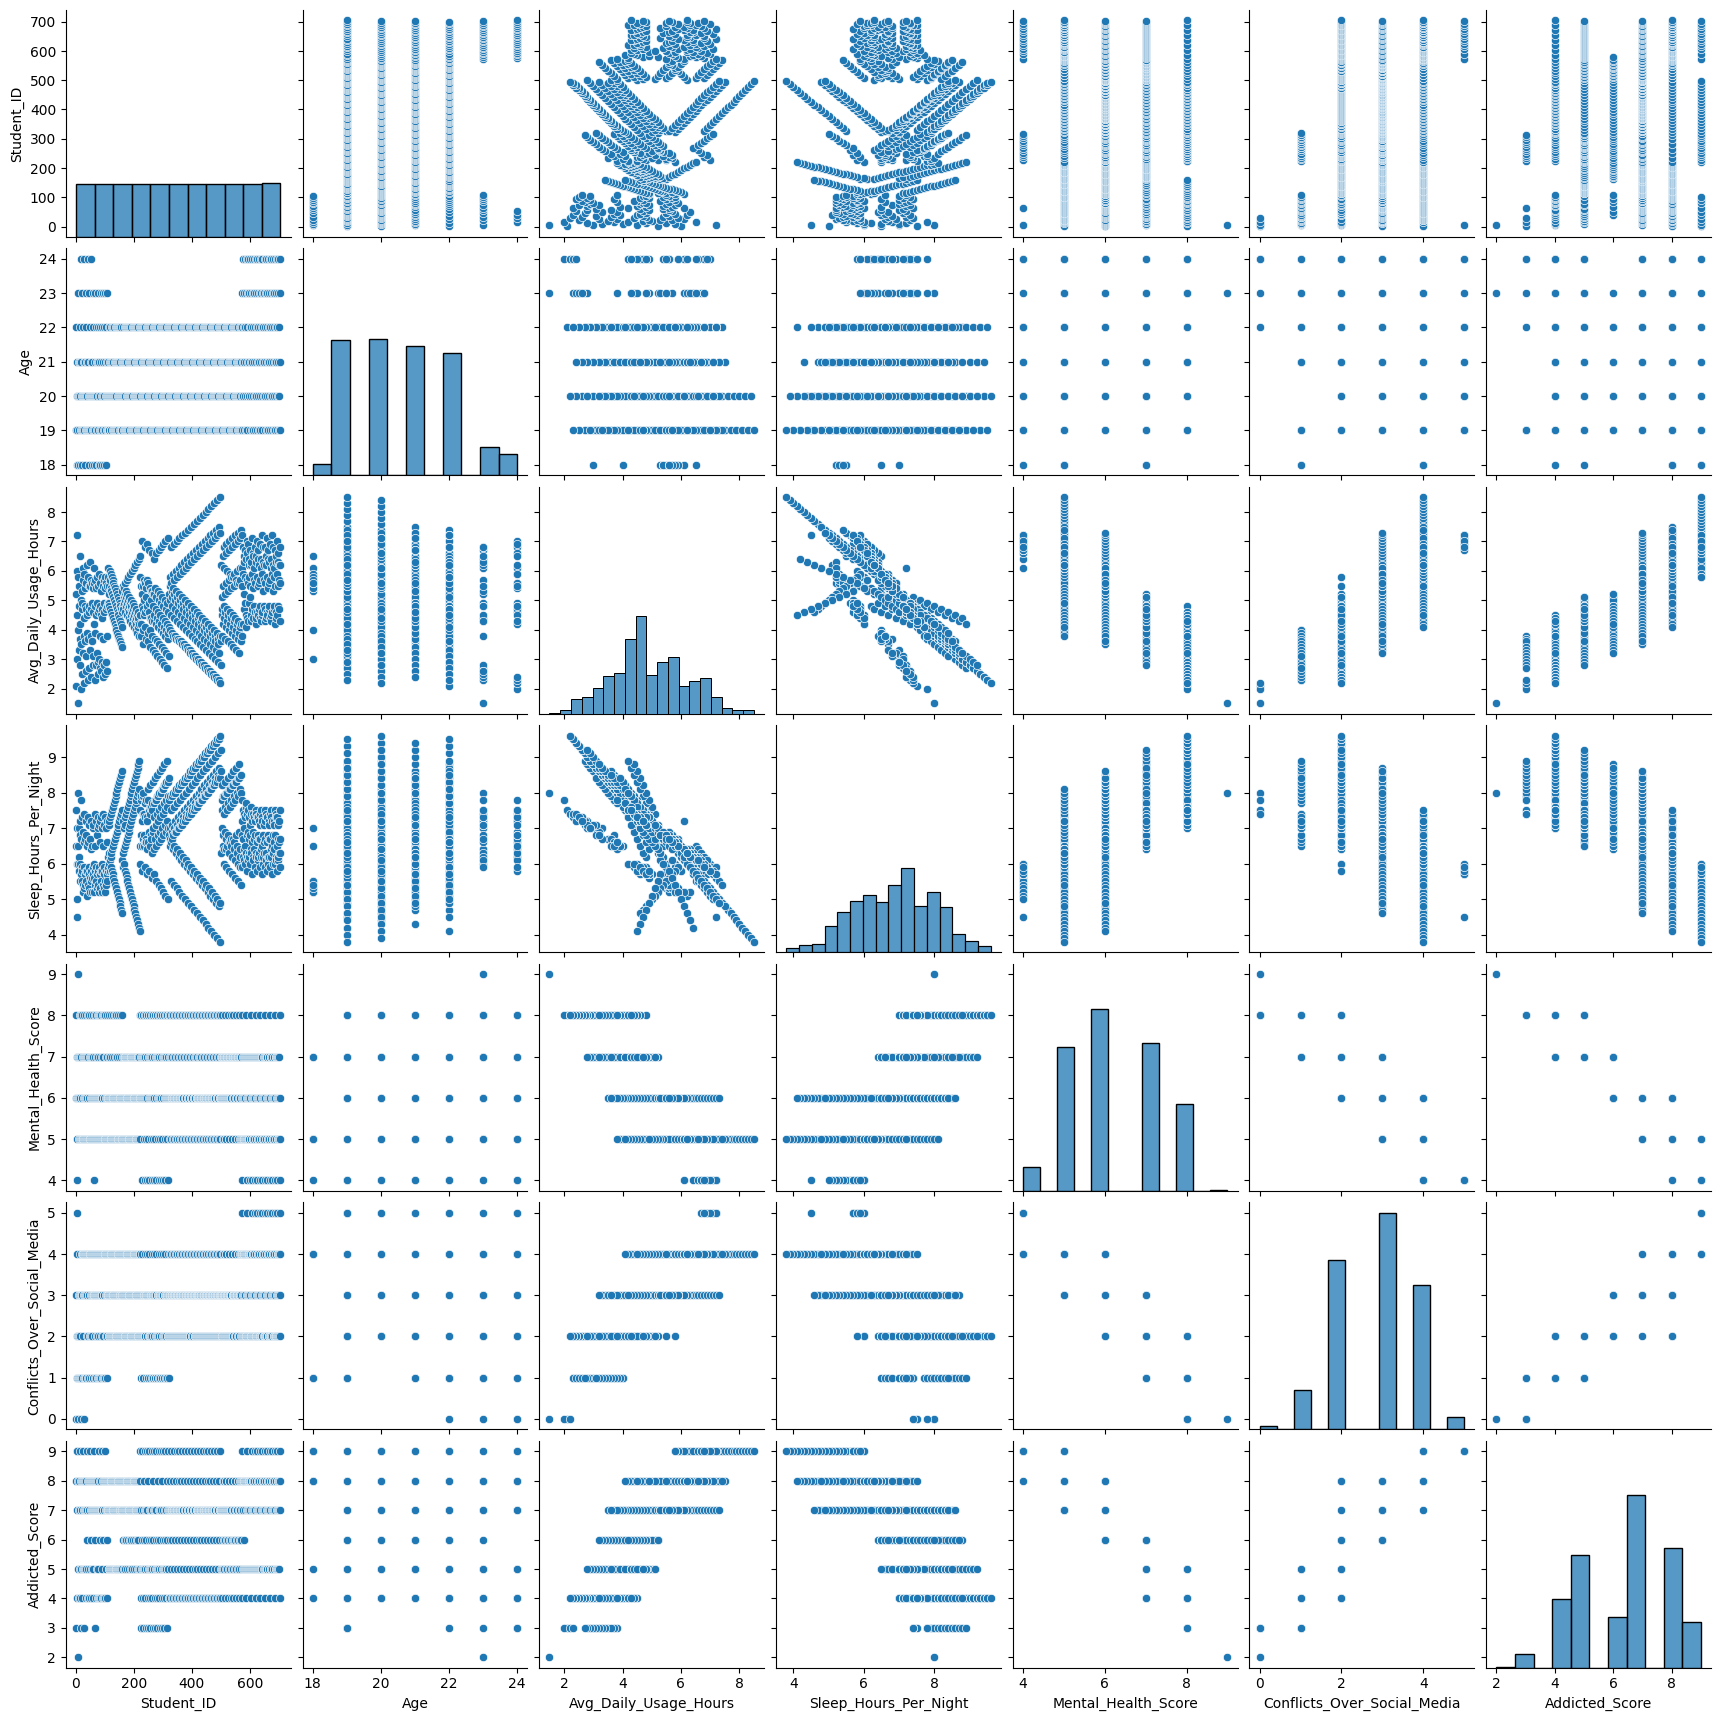

In [15]:
sns.pairplot(df)
plt.show()

In [ ]:
df_visualization_biases = df.copy()


✓ Visualization created successfully!
✓ Total entries: 702
✓ Grid dimensions: 39 rows × 18 columns
✓ Number of categories: 4
✓ Manual screen time bounds: 0.00 - 8.00 hours
✓ Actual screen time range in data: 1.50 - 8.50 hours
✓ Average screen time: 4.92 hours
✓ Using discrete color categories with custom intervals
✓ Exported as transparent PNG successfully!


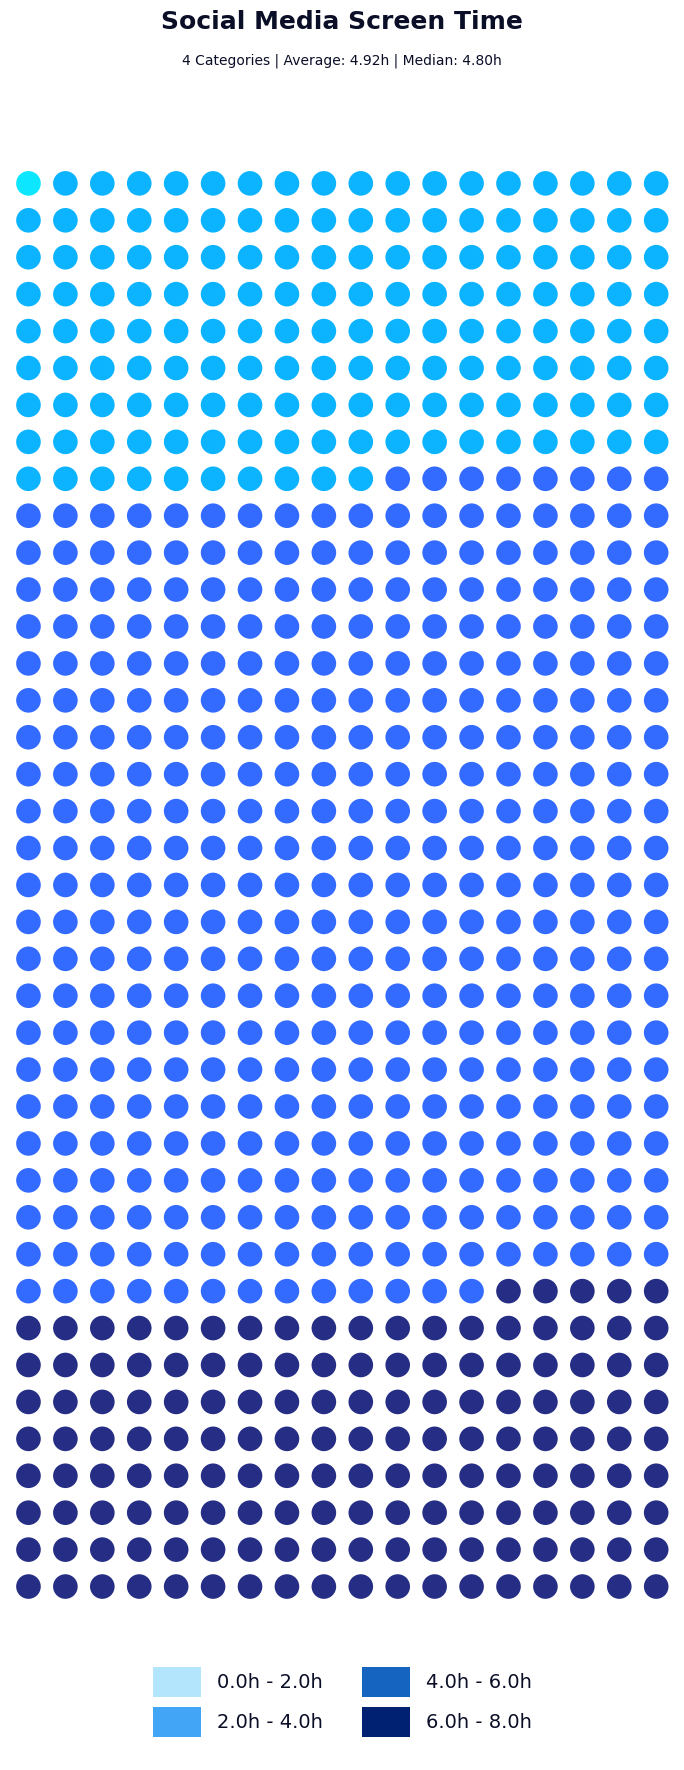

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ------------------------------------------------------------
# 0. DATA: assumes df already exists with the column below
# ------------------------------------------------------------
# df is your DataFrame
hours = df['Avg_Daily_Usage_Hours'].values
hours = hours[:-3] 
# Sort hours from lowest to highest
sorted_indices = np.argsort(hours)
hours_sorted = hours[sorted_indices]


# Recompute mins/max
min_hours = hours.min()
max_hours = hours.max()

# ------------------------------------------------------------
# 1. USER-CONTROLLED INTERVALS (EDIT THIS BLOCK)
# ------------------------------------------------------------
# Example: 4 categories: 0–2 h, 2–4 h, 4–6 h, 6–8 h
# You can change these to any ascending sequence of numbers.
category_bounds = np.array([0, 2, 4, 6, 8])  # <-- EDIT THESE

# Number of categories is number of intervals between bounds
n_categories = len(category_bounds) - 1

# One color per interval (must match n_categories)
category_colors = [
    '#00E5FF',  # 0–2 h  — bright cyan
    '#00B0FF',  # 2–4 h  — strong electric blue
    '#2962FF',  # 4–6 h  — vivid deep blue
    '#1A237E',  # 6–8 h  — dark indigo, still visible on OLED
]
# If you prefer automatic bounds instead, comment out the manual
# category_bounds above and uncomment this:
# n_categories = 4
# category_bounds = np.linspace(min_hours, max_hours, n_categories + 1)

# ------------------------------------------------------------
# 2. USER-CONTROLLED GRID & DOT SPACING (EDIT THIS BLOCK)
# ------------------------------------------------------------
cols = 18        # number of columns (more cols = fewer rows)
x_spacing = 0.015  # horizontal distance between dot centers
y_spacing = 0.015 # vertical distance between dot centers
circle_radius = 0.005  # dot radius (relative to spacing)

# ------------------------------------------------------------
# 3. CATEGORIZE HOURS INTO BINS
# ------------------------------------------------------------
# Digitize using inner cut points of your bounds
bins = category_bounds[1:-1]   # inner edges only
categories = np.digitize(hours_sorted, bins=bins)

# Safety: clip categories so they're always in [0, n_categories-1]
categories = np.clip(categories, 0, n_categories - 1)

# ------------------------------------------------------------
# 4. GRID DIMENSIONS
# ------------------------------------------------------------
n_entries = len(hours_sorted)
rows = int(np.ceil(n_entries / cols))

# ------------------------------------------------------------
# 5. FIGURE & AXIS SETUP
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(9, 18), facecolor='#0A0E27')
ax.set_facecolor('#0A0E27')

# ------------------------------------------------------------
# 6. PLOT THE DOT GRID
# ------------------------------------------------------------
for idx, (hour, category) in enumerate(zip(hours_sorted, categories)):
    row = idx // cols
    col = idx % cols

    # Apply spacing to get the dot position
    x = col * x_spacing
    y = (rows - row - 1) * y_spacing

    color = category_colors[category]

    circle = mpatches.Circle(
        (x, y),
        circle_radius,
        color=color,
        ec='none',
        alpha=0.95
    )
    ax.add_patch(circle)

# Axis limits adjusted to spacing
ax.set_xlim(-0.5 * x_spacing, (cols - 0.5) * x_spacing)
ax.set_ylim(-0.5 * y_spacing, (rows - 0.5) * y_spacing)
ax.set_aspect('equal')
ax.axis('off')





# ------------------------------------------------------------
# 8. TITLE & SUBTITLE, LEGEND
# ------------------------------------------------------------

legend = ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.02),
    ncol=2,
    frameon=False,
    fontsize=14,           # bigger text
    labelcolor='#0A0E27',
    handlelength=2.5,      # bigger color box width
    handleheight=2.0,      # bigger color box height
    borderpad=1.2,         # extra padding around legend items
)
avg_hours = hours_sorted.mean()
median_hours = np.median(hours_sorted)

plt.suptitle(
    'Social Media Screen Time',
    color='#0A0E27',
    fontsize=18,
    fontweight='bold',
    y=0.98
)

subtitle = (
    f'{n_categories} Categories | '
    f'Average: {avg_hours:.2f}h | '
    f'Median: {median_hours:.2f}h'
)

plt.text(
    0.5, 0.95, subtitle,
    transform=fig.transFigure,
    ha='center',
    color='#0A0E27',
    fontsize=10
)

plt.tight_layout()

# ------------------------------------------------------------
# 9. DIAGNOSTIC PRINTS
# ------------------------------------------------------------
print("✓ Visualization created successfully!")
print(f"✓ Total entries: {n_entries}")
print(f"✓ Grid dimensions: {rows} rows × {cols} columns")
print(f"✓ Number of categories: {n_categories}")
print(f"✓ Manual screen time bounds: {category_bounds[0]:.2f} - {category_bounds[-1]:.2f} hours")
print(f"✓ Actual screen time range in data: {min_hours:.2f} - {max_hours:.2f} hours")
print(f"✓ Average screen time: {avg_hours:.2f} hours")
print("✓ Using discrete color categories with custom intervals")


# Make figure transparent
fig.patch.set_alpha(0)
ax.set_facecolor((0,0,0,0))  # transparent axis background

# Export PNG with transparency
plt.savefig(
    "screen_time_transparent.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0,
    transparent=True
)

print("✓ Exported as transparent PNG successfully!")


✓ PNG exported to: screen_time.png


<Figure size 640x480 with 0 Axes>

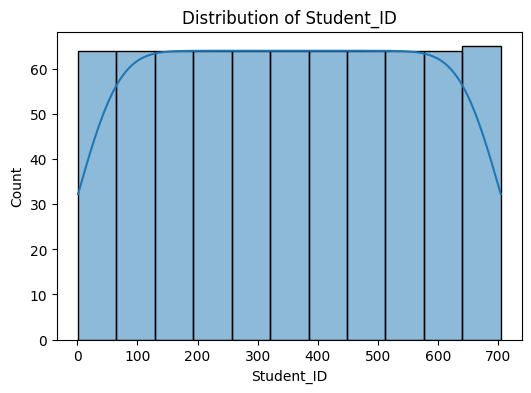

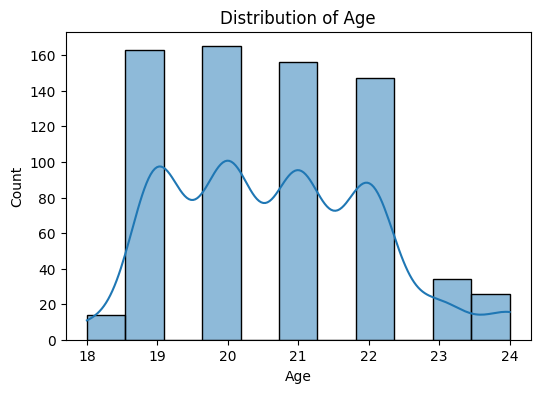

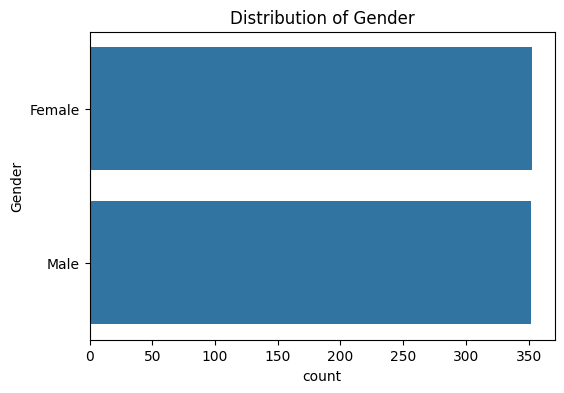

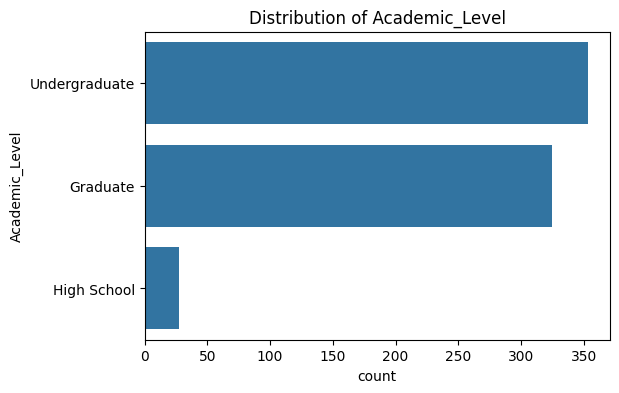

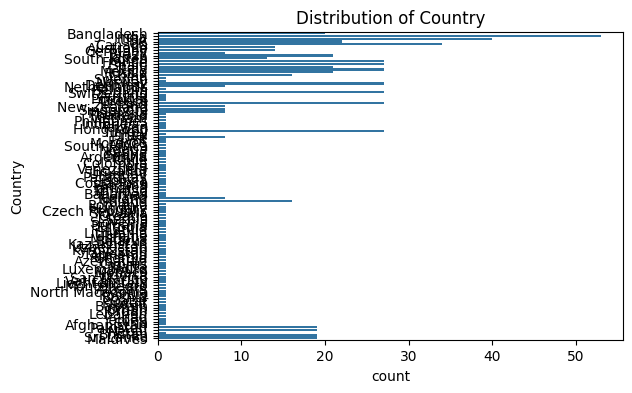

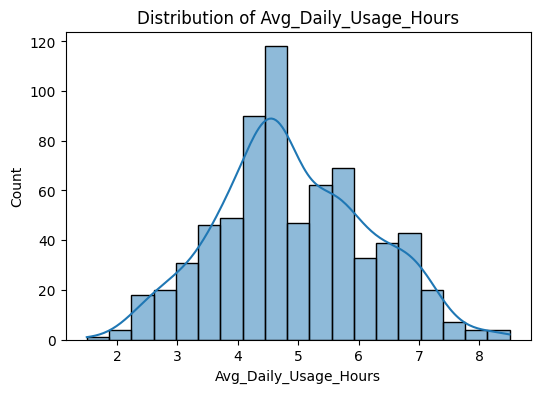

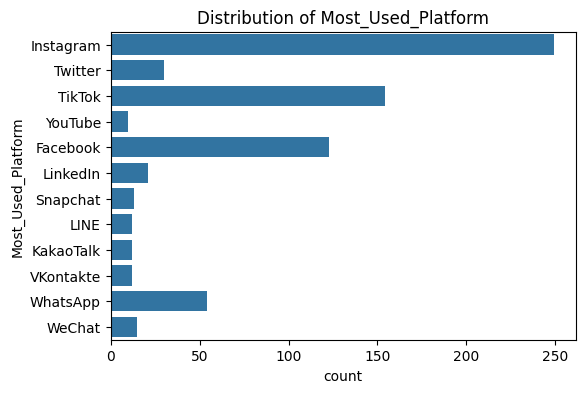

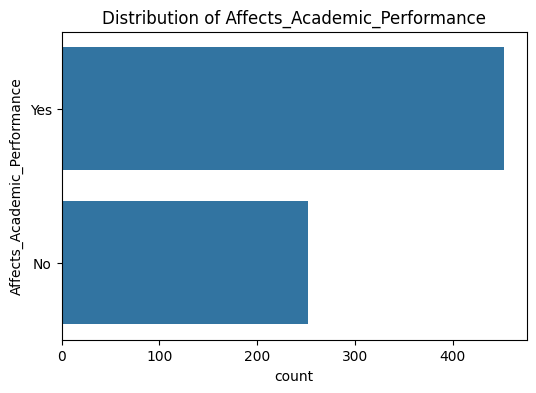

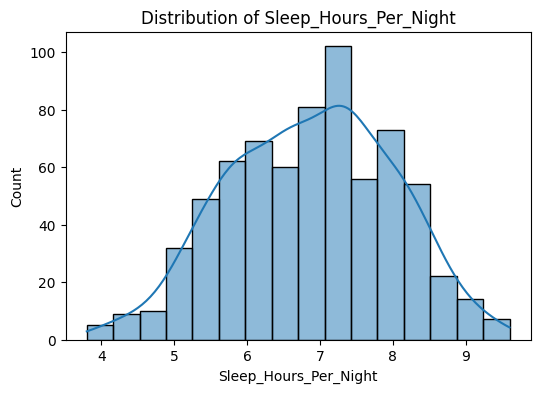

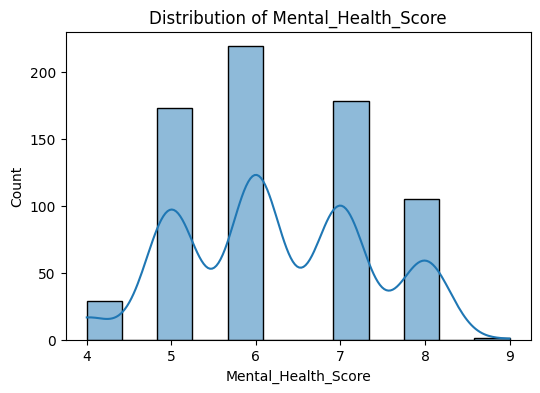

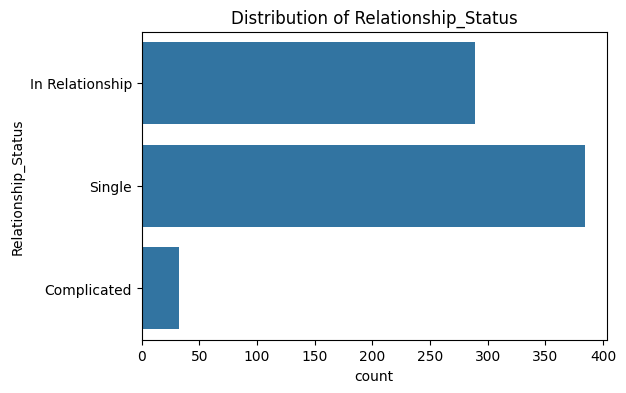

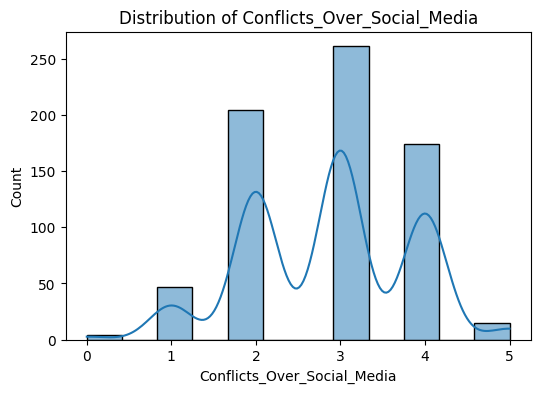

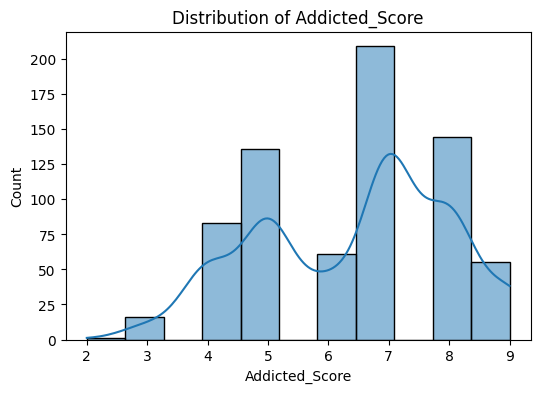

In [17]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    if df[col].dtype == 'object':
        sns.countplot(y=df[col])
    else:
        sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

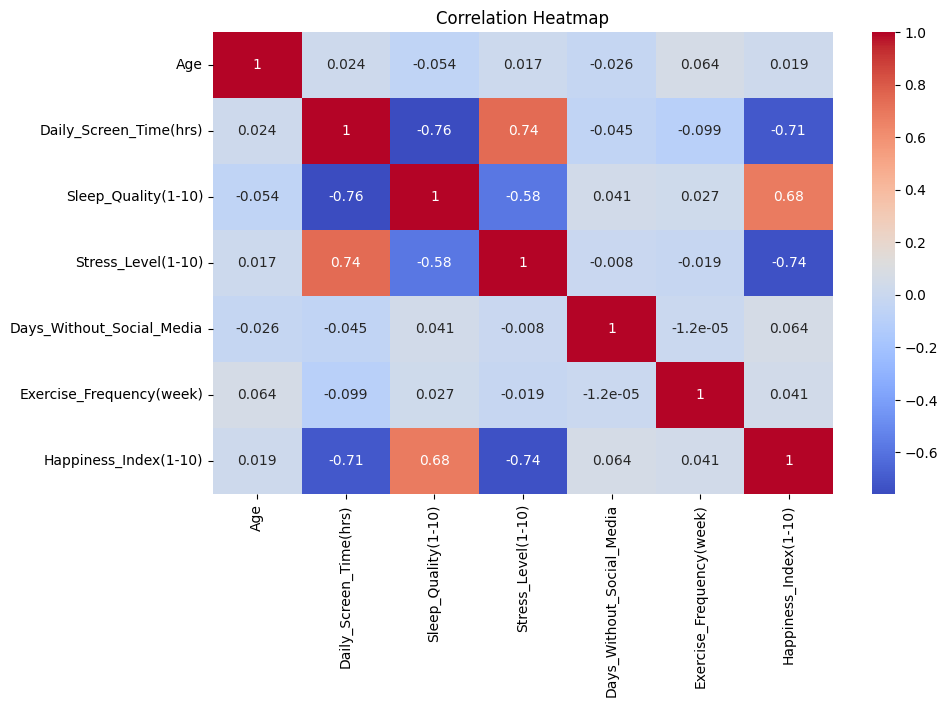